In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, linear_model
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [4]:
bunchobject = datasets.load_breast_cancer()
feature_range = [0, 1]
data_subset = bunchobject.data[:,feature_range]
feature_names_subset = bunchobject.feature_names[feature_range]

feature_col = 0
one_col_data = data_subset[:,feature_col]
feature_name_selected = bunchobject.feature_names[feature_col]
number_of_bins = 30
title_string = 'Histogram'

x_index = 0
y_index = 3
x = bunchobject.data[:,x_index]
y = bunchobject.data[:,y_index]
x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

unique, counts = np.unique(bunchobject.target, return_counts = True )

first_column = bunchobject.data[:, np.newaxis, 1]
col_no = [ 0 , 1 , 2 ]
some_columns = bunchobject.data[:,col_no]

In [5]:
def get_metrics(actual_targets, predicted_targets, labels):
    c_matrix = confusion_matrix(actual_targets, predicted_targets)  #Note: labels supposed to be third argument
    recs = c_matrix.sum()
    acc = round(accuracy_score(actual_targets, predicted_targets), 3)  #round((c_matrix[0, 0] + c_matrix[1, 1]) / recs, 3)
    sens = round(recall_score(actual_targets, predicted_targets), 3)  #round(c_matrix[1, 1] / (c_matrix[1, 0] + c_matrix[1, 1]), 3)
    fpr = round(c_matrix[0, 1] / (c_matrix[0, 0] + c_matrix[0, 1]), 3)
    metrics = {
        "confusion matrix": c_matrix,
        "total records": recs,
        "accuracy": acc,
        "sensitivity": sens,
        "false positive rate": fpr
    }
    return metrics

In [6]:
def display_box_plots(data, feature_names, title_name='default'):
    plt.boxplot(data)
    plt.title(title_name)
    feature_names = np.insert(feature_names, 0, '')
    feature_names = np.append(feature_names, '')
    plt.xticks(np.arange(len(feature_names)), feature_names)
    plt.show()

In [7]:
def display_histogram(data, nbins, feature_name, title_name='default'):
    plt.hist(data, bins=nbins)
    plt.title(title_name)
    plt.xlabel(feature_name)
    plt.show()

In [8]:
def display_scatter(x, y, xlabel='x', ylabel='y', title_name='default'):
    plt.scatter(x, y)
    plt.title(title_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [9]:
def display_bar_chart(positions, counts, names, title_name='default'):
    plt.bar(positions, counts)
    plt.title(title_name)
    plt.xticks(positions, names)
    plt.show()

In [10]:
def five_number_summary(x):
    summary = []
    columns = x.shape[1]
    for i in range(columns):
        fns_0 = np.min(x[:,i])
        fns_25 = np.percentile(x[:,i], 25)
        fns_50 = np.median(x[:,i])
        fns_75 = np.percentile(x[:,i], 75)
        fns_100 = np.max(x[:,i])
        column = {
            "minimum": fns_0,
            "first quartile": fns_25,
            "median": fns_50,
            "third quartile": fns_75,
            "maxmimum": fns_100
        }
        summary.append(column)
    return summary

In [11]:
def normalize_minmax(data):
    columns = data.shape[1]
    rows = data.shape[0]
    norm = np.zeros((rows, columns))
    for i in range(columns):
        minimum = np.min(data[:,i])
        maximum = np.max(data[:,i])
        span = maximum - minimum
        for j in range(rows):
            normalized = (data[j, i] - minimum) / span
            norm[j, i] = normalized
    return norm

In [12]:
def linear_regression(bunchobject, x_index, y_index, size, seed):
    x_train, x_test, y_train, y_test = train_test_split(
        bunchobject.data[:, x_index],
        bunchobject.data[:, y_index],
        test_size = size,
        random_state = seed
    )
    x_train = x_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results = {
        'coefficients': regr.coef_,
        'intercept': regr.intercept_,
        'mean squared error': mse,
        'r2 score': r2
    }
    return x_train, y_train, x_test, y_pred, results

In [13]:
def plot_linear_regression(x1, y1, x2, y2, x_label='', y_label=''):
    plt.scatter(x1, y1, color='black')
    plt.plot(x2, y2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [14]:
def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
    x_train, x_test, y_train, y_test = train_test_split(
        bunchobject.data[:, x_index],
        bunchobject.data[:, y_index],
        test_size = size,
        random_state = seed
    )
    x_train = x_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    poly = PolynomialFeatures(order, include_bias=False)
    c_data = poly.fit_transform(x_train, y_train)
    t_data = poly.fit_transform(x_test, y_train)
    regr = linear_model.LinearRegression()
    regr.fit(c_data, y_train)
    y_pred = regr.predict(t_data)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results = {
        'coefficients': regr.coef_,
        'intercept': regr.intercept_,
        'mean squared error': mse,
        'r2 score': r2
    }
    return x_train, y_train, x_test, y_pred, results

In [15]:
def knn_classifier(bunchobject, feature_list, size, seed, k):
    data = normalize_minmax(bunchobject.data)
    data_train, data_test, target_train, target_test = train_test_split(
        data[:, feature_list],
        bunchobject.target,
        test_size = size,
        random_state = seed
    )
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(data_train, target_train)
    target_predicted = clf.predict(data_test)
    results = get_metrics(target_test, target_predicted, bunchobject.target_names)
    return results

In [16]:
def knn_classifier_full(bunchobject, feature_list, size, seed):
    data = normalize_minmax(bunchobject.data)
    data_train, data_part2, target_train, target_part2 = train_test_split(
        data[:, feature_list],
        bunchobject.target,
        test_size = size,
        random_state = seed
    )
    data_validation, data_test, target_validation, target_test = train_test_split(
        data_part2,
        target_part2,
        test_size = 0.5,
        random_state = seed
    )
    acc = [None] # 0th index not used
    metrics = [None] # 0th index not used
    for k in range(1, 20):
        clf = neighbors.KNeighborsClassifier(n_neighbors = k)
        clf.fit(data_train, target_train)
        target_predicted = clf.predict(data_validation)
        metrics.append(get_metrics(target_validation, target_predicted, bunchobject.target_names))
        acc.append(metrics[k].get('accuracy'))
    max_acc = max(acc[1:])
    best = acc.index(max_acc)
    clf = neighbors.KNeighborsClassifier(n_neighbors = best)
    clf.fit(data_train, target_train)
    target_predicted = clf.predict(data_test)
    results = get_metrics(target_test, target_predicted, bunchobject.target_names)
    out_results = {
        'best_k': best,
        'validation set': metrics[best],
        'test set': results
    }
    return out_results

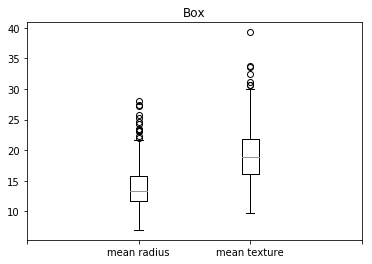

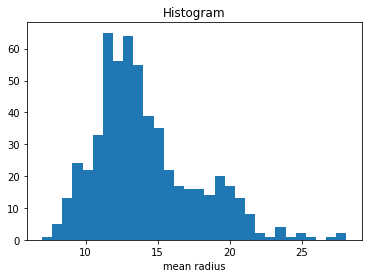

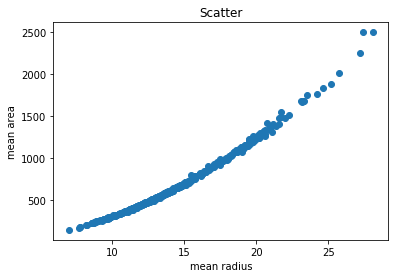

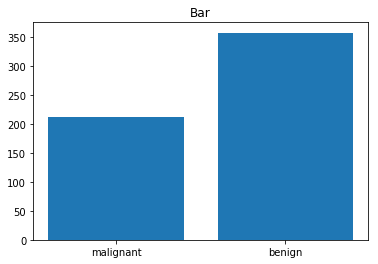

[{'minimum': 6.981, 'first quartile': 11.7, 'median': 13.37, 'third quartile': 15.78, 'maxmimum': 28.11}, {'minimum': 9.71, 'first quartile': 16.17, 'median': 18.84, 'third quartile': 21.8, 'maxmimum': 39.28}, {'minimum': 43.79, 'first quartile': 75.17, 'median': 86.24, 'third quartile': 104.1, 'maxmimum': 188.5}]
normalized [{'minimum': 0.0, 'first quartile': 0.22334232571347437, 'median': 0.30238061432154856, 'third quartile': 0.41644185716314075, 'maxmimum': 1.0}, {'minimum': 0.0, 'first quartile': 0.21846466012850865, 'median': 0.30875887724044637, 'third quartile': 0.40886033141697664, 'maxmimum': 1.0}, {'minimum': 0.0, 'first quartile': 0.2168474880796075, 'median': 0.2933453113122797, 'third quartile': 0.41676456360997854, 'maxmimum': 1.0}]
{'confusion matrix': array([[ 73,   9],
       [  5, 141]], dtype=int64), 'total records': 228, 'accuracy': 0.939, 'sensitivity': 0.966, 'false positive rate': 0.11}
{'coefficients': array([[100.16755386]]), 'intercept': array([-760.52027342]

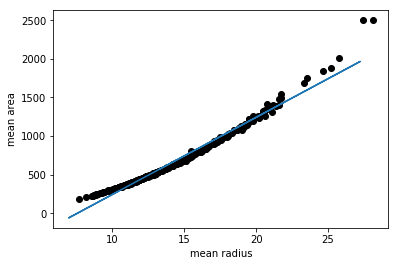

{'coefficients': array([[-1.28141031e+02,  1.57502508e+01, -5.29186793e-01,
         7.97220165e-03]]), 'intercept': array([459.72265999]), 'mean squared error': 145.64415629851655, 'r2 score': 0.9987670855952149}


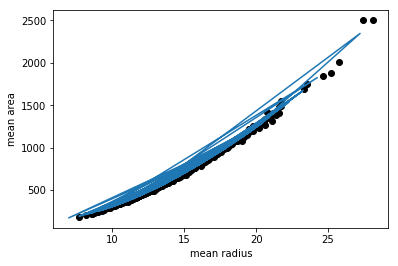

{'best_k': 4, 'validation set': {'confusion matrix': array([[39,  2],
       [ 2, 71]], dtype=int64), 'total records': 114, 'accuracy': 0.965, 'sensitivity': 0.973, 'false positive rate': 0.049}, 'test set': {'confusion matrix': array([[40,  1],
       [ 4, 69]], dtype=int64), 'total records': 114, 'accuracy': 0.956, 'sensitivity': 0.945, 'false positive rate': 0.024}}


In [17]:
# Test cases

display_box_plots(data_subset,feature_names_subset, 'Box')
display_histogram(one_col_data, number_of_bins, feature_name_selected, title_string)
display_scatter(x,y,x_label,y_label, 'Scatter')
display_bar_chart(unique, counts, bunchobject.target_names, 'Bar')
print(five_number_summary(some_columns))
snorm = normalize_minmax(some_columns)
print( 'normalized' , five_number_summary(snorm))

# kNN Classifier:
features = range(20)
results = knn_classifier(bunchobject, features, 0.40, 2752, 3)
print(results)

# Linear Regression:
x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject, 0, 3, 0.4, 2752)
print(results)
plot_linear_regression(x_train, y_train, x_test, y_pred, bunchobject.feature_names[0], bunchobject.feature_names[3])


# Multiple Linear Regression:
x_train, y_train, x_test, y_pred, results = multiple_linear_regression(bunchobject, 0, 3, 4, 0.4, 2752)
print(results)
plot_linear_regression(x_train, y_train, x_test, y_pred, bunchobject.feature_names[0], bunchobject.feature_names[3])

# Full kNN Classifier:
results = knn_classifier_full(bunchobject, features, 0.40, 2752)
print(results)